In [52]:
import pandas as pd
import numpy as np

In [42]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [8]:
pd.__version__

'1.3.5'

In [53]:
data = pd.read_csv("D:/Project/Data Sciences/pandas/train.csv")

In [60]:
drop = data.dropna(inplace=False)


In [63]:
drop.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [68]:
x=drop.iloc[:,0:4]
y = data.iloc[:,-1]
x.head()

,PassengerId,Survived,Pclass,Name
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
6,7,0,1,"McCarthy, Mr. Timothy J"
10,11,1,3,"Sandstrom, Miss. Marguerite Rut"
11,12,1,1,"Bonnell, Miss. Elizabeth"


In [72]:
def myfun(num):
    if(num==1):
        return 0
    elif(num>1 and num<=4):
        return 1
    else:
        return 2
myfun(4)

1

In [78]:
data['sib']=data['SibSp'].apply(myfun)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,sib
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,2
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,0
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,2


<AxesSubplot:>

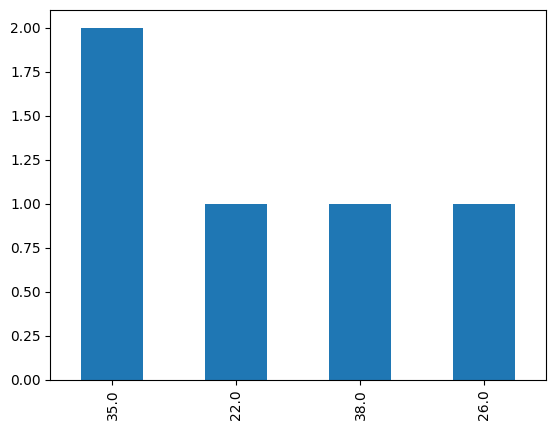

In [10]:
data['Age'].head(5).value_counts().plot.bar()

In [40]:
data['PassengerId']= pd.to_numeric(data['PassengerId'],errors='coerce' , downcast='integer')
data['Cabin'].str.extract('(\d+)')

,0
0,NaN
1,85
2,NaN
3,123
4,NaN
...,...
886,NaN
887,42
888,NaN
889,148



**Goal ** : I looked at the data to see how many people are relatives and what is their age. and i will also looked that how many people are unrelated

 **Visualisation**
(bar, pie, column etc.):

<figure>
  <left>
    <img src='D:\Project\data_analyst_project\Titanic\download.jfif' />
    <figcaption>Popular types of visuals</figcaption>
  </left>
</figure>

 Bar plot 1
  - Numeric column and aggregation (sum, percentage etc.): Survived - sum
  - Categorical column: Pclass
  - Active filters: Age

- Bar plot 2
  - Numeric column and aggregation (sum, percentage etc.): Survived - percentage  
  - Categorical column: Pclass
  - Active filters: Age

- Bar plot 3
  - Numeric column and aggregation (sum, percentage etc.): Survived - percentage   
  - Categorical column 1: Pclass
  - Categorical column 2: Age (Children, Adults, Seniors)
  - Active filters: None

In [6]:
# Display basic information about the DataFrame
print("Basic Information:")
print(data.info())

# Display summary statistics
print("\nSummary Statistics:")
print(data.describe())

# Display number of missing values in each column
print("\nNumber of Missing Values:")
print(data.isnull().sum())

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Summary Statistics:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0

In [7]:
# Calculate the mean of the Age column
age_mean = data['Age'].mean()

# Replace missing values in the Age column with the mean
data['Age'].fillna(age_mean, inplace=True)

# Verify that there are no missing values in the Age column
print("\nNumber of Missing Values in Age column:")
print(data['Age'].isnull().sum())


Number of Missing Values in Age column:
0


In [9]:
# Round the values in the Age column
data['Age'] = data['Age'].round()

# Display summary statistics
print("\nSummary Statistics:")
print(data.describe())


Summary Statistics:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.754209    0.523008   
std     257.353842    0.486592    0.836071   13.000828    1.102743   
min       1.000000    0.000000    1.000000    0.000000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   30.000000    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [10]:
# Round the values in the Age column
data['Age'] = data['Age'].round()

# Define a function to categorize age
def categorize_age(age):
    if age <= 14:
        return 'Children'
    elif 15 <= age <= 64:
        return 'Youth&Adults'
    else:
        return 'Seniors'

# Create the 'age_category' column
data['age_category'] = data['Age'].apply(categorize_age)

print(data['age_category'].value_counts())

Youth&Adults    802
Children         78
Seniors          11
Name: age_category, dtype: int64


In [11]:
#@title Tableau Dashboard
from IPython.display import HTML

HTML("""
<div class='tableauPlaceholder' id='viz1722260682023' style='position: relative'><noscript><a href='#'><img alt='Dashboard 1 ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ti&#47;TitanicI_TableauDashboard&#47;Dashboard1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='TitanicI_TableauDashboard&#47;Dashboard1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ti&#47;TitanicI_TableauDashboard&#47;Dashboard1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-GB' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1722260682023');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='1024px';vizElement.style.height='795px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='1024px';vizElement.style.height='795px';} else { vizElement.style.width='100%';vizElement.style.height='1327px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>
""")

In [12]:
#@title Power BI Dashboard

from IPython.display import HTML

HTML("""
<div style="position: relative; width: 100%; height: 0; padding-bottom: 40.25%;">
    <iframe src=" https://www.youtube.com/embed/bkXIEIh1C9g?si=gW9trksDsoxCDpO0"
    style="position: absolute; top: 0; left: 0; width: 100%; height: 100%;"
    frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture"
    allowfullscreen></iframe>
</div>
""")


Goal: See if survival rate had anything to do with the passanger class. Also, assess the age of the passengers within each class to identify vulnerable age categories.

Assessment: The data analytics dashboard reveals significant differences in survival rates among various passenger classes on the Titanic. When examining the survival percentages, a substantial disparity is evident. First-class passengers had almost three times the survival rate compared to third-class passengers. This underscores the importance of analyzing survival percentages rather than merely the total number of survivors.

For first-class passengers, the survival rate is approximately 60%. However, when considering the percentage of survivors within each class, the rate is notably higher, emphasizing the critical need to differentiate between overall survival rates and class-specific survival percentages.

Age also played a significant role in survival outcomes. Second-class children had a 100% survival rate, compared to 80% for first-class and 40% for third-class children. No seniors survived in the second and third classes, while only 17% (one individual) survived in the first class. It is essential to conduct a deeper statistical analysis for the first class result to determine if this survival rate among seniors is statistically significant or due to chance.

Recommendations:

•    Focus on minimizing the disparity between passenger classes.
•    Investigate emergency accessibility measures to improve survival rates for all age categories across all classes.
•    Use these insights to initiate further data analysis (statistical analysis) to design ships that ensure more equitable safety provisions for all passengers, regardless of class or age.
 